# Benchmarking Multiple Models

---


### Table of Contents:
- <a href='#1'>1. Read Data </a>
- <a href='#2'>2. Add Models to Benchmark </a>
- <a href='#3'>3. Results </a>
    - <a href='#3.1'>3.1 Overall Metrics </a>
    - <a href='#3.2'>3.2 Interactive Plot </a>

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../modules")
from utils import load_and_preprocess_titanic
from dp_benchmark import DifferentialPrivacyBenchmark
%matplotlib widget

from diffprivlib.models import LogisticRegression, GaussianNB, RandomForestClassifier, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.naive_bayes import GaussianNB as SklearnGaussianNB
from sklearn.ensemble import RandomForestClassifier as SklearnRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier

# <a id='1'>1. Read Data</a>
-----

In [2]:
# Load and preprocess the Titanic dataset
X, y = load_and_preprocess_titanic()

# Set the epsilon values with logarithmic spacing
epsilon_values = np.logspace(-2, 4, 25)

# <a id='2'>2. Add Models to Benchmark</a>
-----

In [3]:
# Classification benchmark
classification_benchmark = DifferentialPrivacyBenchmark(X, y, epsilon_values)
classification_benchmark.scale_data()

# Add private and non-private benchmarks
classification_benchmark.benchmark_private_model("Logistic Regression", LogisticRegression)
classification_benchmark.benchmark_non_private_model("Logistic Regression", SklearnLogisticRegression)

classification_benchmark.benchmark_private_model("Naive Bayes", GaussianNB)
classification_benchmark.benchmark_non_private_model("Naive Bayes", SklearnGaussianNB)

classification_benchmark.benchmark_private_model("Random Forest", RandomForestClassifier)
classification_benchmark.benchmark_non_private_model("Random Forest", SklearnRandomForestClassifier)

classification_benchmark.benchmark_private_model("Decision Tree", DecisionTreeClassifier)
classification_benchmark.benchmark_non_private_model("Decision Tree", SklearnDecisionTreeClassifier)

# Get, display and save results
results_df = classification_benchmark.get_results_dataframe()
results_df.to_csv("test_results/classification_benchmark_results.csv", index=False)
print(results_df)

                   Model      Epsilon  Accuracy  Precision    Recall        F1
0    Logistic Regression         0.01  0.435754   0.333333  0.364865  0.348387
1    Logistic Regression     0.017783  0.793296   0.760563  0.729730  0.744828
2    Logistic Regression     0.031623  0.446927   0.371134  0.486486  0.421053
3    Logistic Regression     0.056234  0.435754   0.341176  0.391892  0.364780
4    Logistic Regression          0.1  0.525140   0.365854  0.202703  0.260870
..                   ...          ...       ...        ...       ...       ...
99         Decision Tree   1778.27941  0.804469   0.791045  0.716216  0.751773
100        Decision Tree   3162.27766  0.692737   0.851852  0.310811  0.455446
101        Decision Tree  5623.413252  0.798883   0.816667  0.662162  0.731343
102        Decision Tree      10000.0  0.776536   0.765625  0.662162  0.710145
103        Decision Tree  Non-Private  0.776536   0.717949  0.756757  0.736842

[104 rows x 6 columns]


# <a id='3'>3. Results</a>
-----

## <a id='3.1'>3.1 Overall Metrics</a>

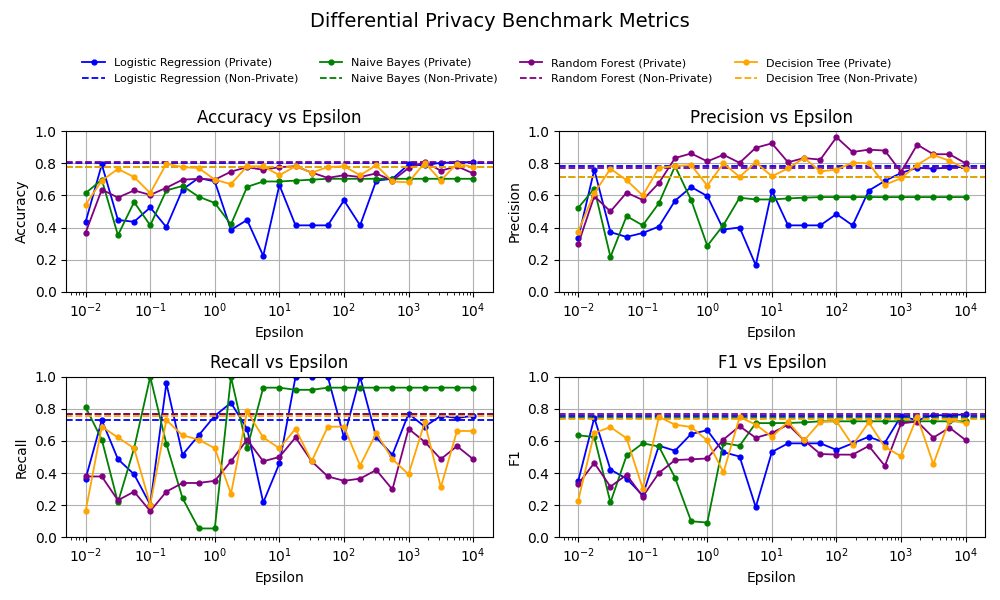

In [4]:
img_path = "../plots/classification_benchmark_metrics.png"
classification_benchmark.plot_metrics(img_path)

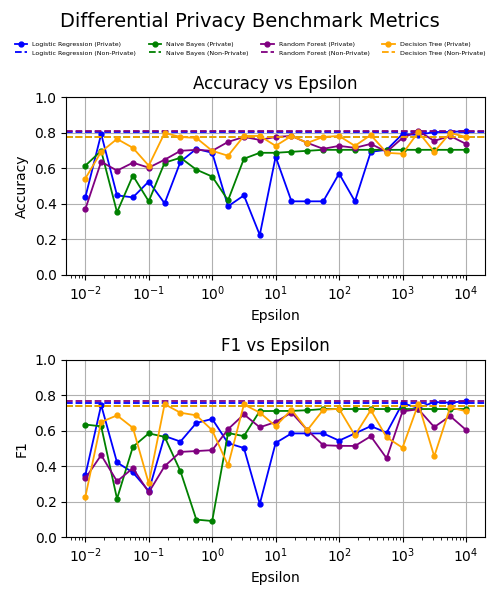

In [5]:
img_path = "../plots/classification_benchmark_acc_f1.png"
classification_benchmark.plot_metrics_acc_f1(img_path)

## <a id='3.2'>3.2 Interactive Plot</a>

IntSlider(value=0, description='Epsilon', max=24, style=SliderStyle(description_width='initial'))

Dropdown(description='Metric', options=('F1', 'Accuracy', 'Precision', 'Recall'), style=DescriptionStyle(descr…

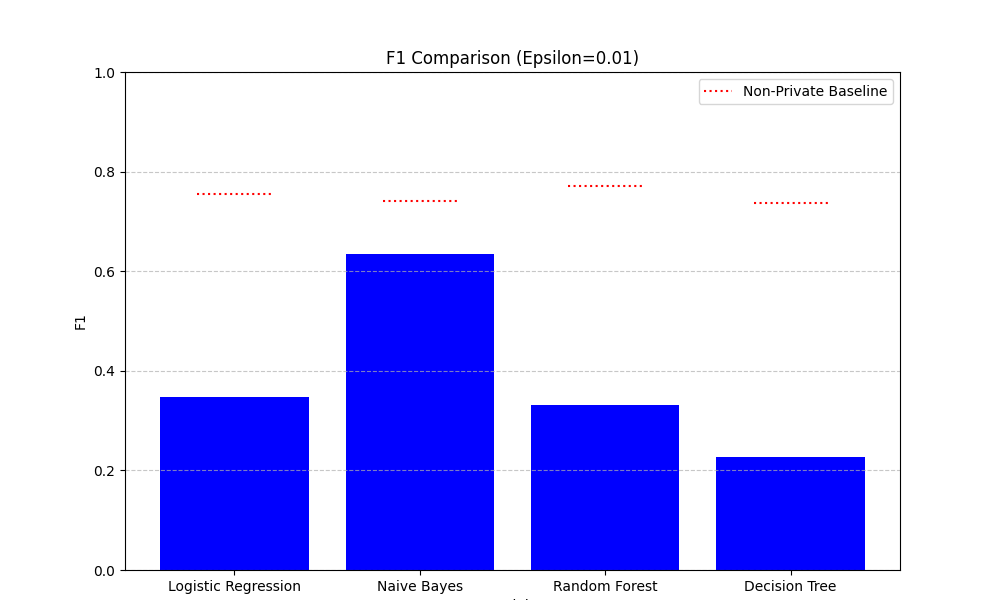

In [6]:
classification_benchmark.plot_interactive_bar_chart()